# Blood transfusion classification using ML algorithms and Ensemble methods

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier

# Importing Dataset

In [2]:
data=pd.read_csv('../input/blood-transfusion-dataset/transfusion.csv')

In [3]:
data.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1


# Check for missing values

In [4]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

There are no missing values to remove or add values

# Exploratory data analysis

The "Blood Transfusion Service Center" is a classification problem. 
The order of this listing corresponds to the order of numerals along the rows of the database.
* R (Recency - months since last donation)
* F (Frequency - total number of donation)
* M (Monetary - total blood donated in c.c.)
* T (Time - months since first donation)
* A binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood)



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:>

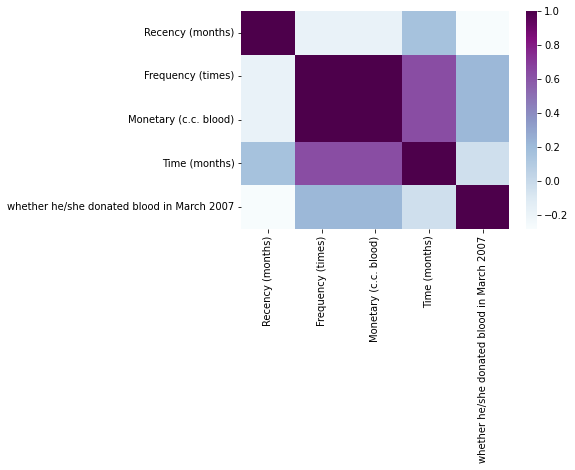

In [7]:
sns.heatmap(data.corr(),cmap='BuPu')

Heatmaps helps us to understand the correlation between each variables

In [8]:
data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Splitting dataset into train and test

In [9]:
X=data[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']]
y=data['whether he/she donated blood in March 2007']

In [10]:
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min()) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000
744,0.283784,0.020408,0.020408,0.520833
745,0.310811,0.040816,0.040816,0.625000
746,0.527027,0.000000,0.000000,0.385417


Scaling of data was done.This helps us to get better results

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
X_train.shape

(523, 4)

In [14]:
X_test.shape

(225, 4)

In [15]:
y_train.shape

(523,)

In [16]:
y_test.shape

(225,)

# Training ML algorithms

**Random forest** 

In [17]:
classifier= RandomForestClassifier(n_estimators= 10)  
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=10)

In [18]:
y_pred= classifier.predict(X_test)  

**Evaluation Metrics**

In [19]:
def eval_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [20]:
eval_metrics(classifier,X_train, y_train, X_test, y_test)

Test_Set
[[157  22]
 [ 33  13]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       179
           1       0.37      0.28      0.32        46

    accuracy                           0.76       225
   macro avg       0.60      0.58      0.59       225
weighted avg       0.73      0.76      0.74       225


Train_Set
[[383   8]
 [ 36  96]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       391
           1       0.92      0.73      0.81       132

    accuracy                           0.92       523
   macro avg       0.92      0.85      0.88       523
weighted avg       0.92      0.92      0.91       523



**XG Boost**

In [21]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
eval_metrics(xgb_model,X_train, y_train, X_test, y_test)

Test_Set
[[153  26]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       179
           1       0.37      0.33      0.34        46

    accuracy                           0.75       225
   macro avg       0.60      0.59      0.59       225
weighted avg       0.74      0.75      0.74       225


Train_Set
[[384   7]
 [ 36  96]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       391
           1       0.93      0.73      0.82       132

    accuracy                           0.92       523
   macro avg       0.92      0.85      0.88       523
weighted avg       0.92      0.92      0.91       523



**Voting Classifier**

In [23]:
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4= KNeighborsClassifier(n_neighbors=2)
estimators.append(('knn', model4))
model5=  GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
estimators.append(('gb', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7664144144144144


**ML Algorithms**

In [24]:
models = {
    "Logistic Regression": LogisticRegression(C=10),
    "SVM": SVC(C=0.5),
    "Decision Tree": DecisionTreeClassifier( max_depth=10),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
}
results = []
for name, model in models.items():
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  train_acc= accuracy_score(y_train, y_train_pred)
  test_acc= accuracy_score(y_test, y_pred)
  results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model Name", "Training accuracy", "Test accuracy"])
df_results

,Model Name,Training accuracy,Test accuracy
0,Logistic Regression,0.759082,0.804444
1,SVM,0.759082,0.800000
2,Decision Tree,0.904398,0.737778
3,KNN,0.824092,0.791111
4,Gradient Boosting,0.753346,0.800000


**Stacking Method**

In [25]:
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4= KNeighborsClassifier(n_neighbors=2)
estimators.append(('knn', model4))
model5=  GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
estimators.append(('gb', model5))
# create the ensemble model
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
res=clf.fit(X_train, y_train).score(X_test, y_test)
print(res)

0.8222222222222222


**The accuracy for the different models were seen above**